# Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
import plotly.io as pio

pio.renderers.default = "png"

## 1.โหลด csv เข้าไปใน Python Pandas

In [3]:
df = pd.read_csv('Wine_customer.csv')

## 2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว


In [4]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [5]:
df.tail(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750,3
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630,3
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,3
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,3
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660,3
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560,3


In [6]:
df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
157,12.45,3.03,2.64,27.0,97,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,3
117,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345,2
49,13.94,1.73,2.27,17.4,108,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260,1
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
28,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915,1
112,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607,2
37,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105,1
99,12.29,3.17,2.21,18.0,88,2.85,2.99,0.45,2.81,2.30,1.42,2.83,406,2
136,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720,3


## 3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม


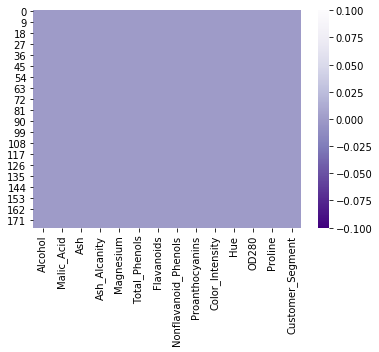

In [7]:
sns.heatmap(df.isnull(), cmap='Purples_r')

Note :  
ไม่มี Missing values

## 4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Note :  
* มีข้อมูลเพียง 178 แถว ถือว่าน้อย

In [9]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


## 5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ


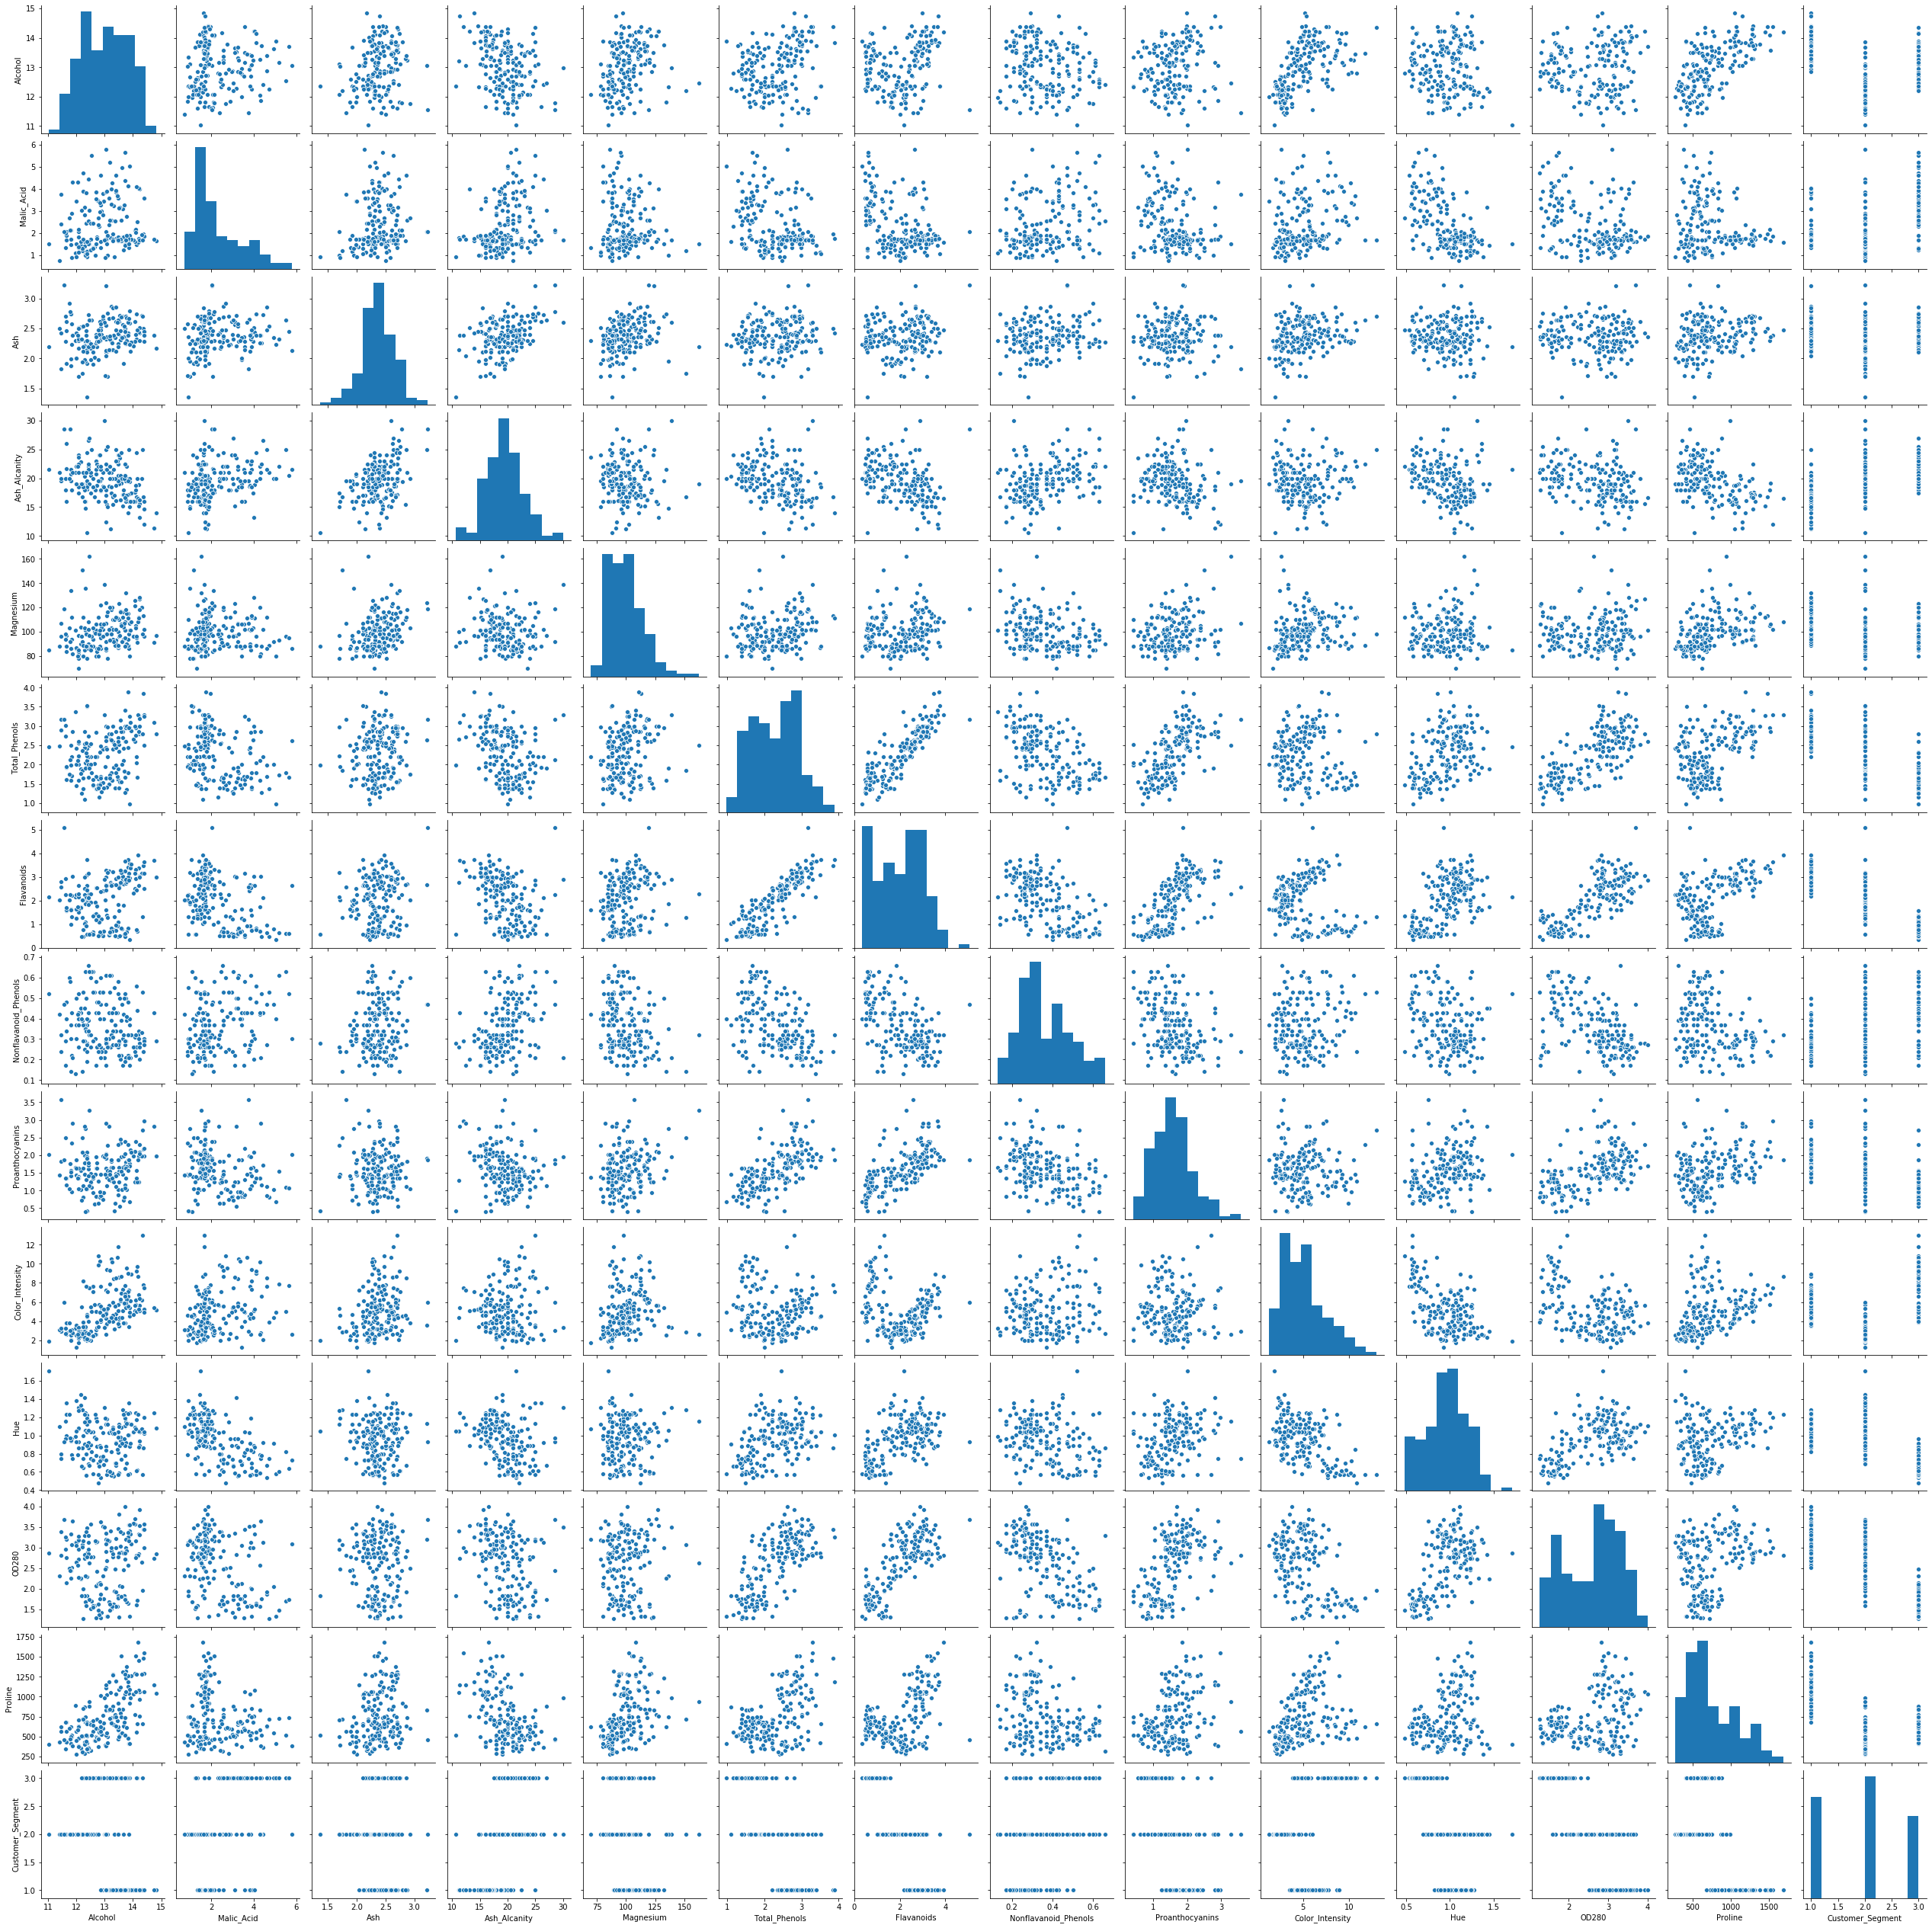

In [10]:
sns.pairplot(df)

## 6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์


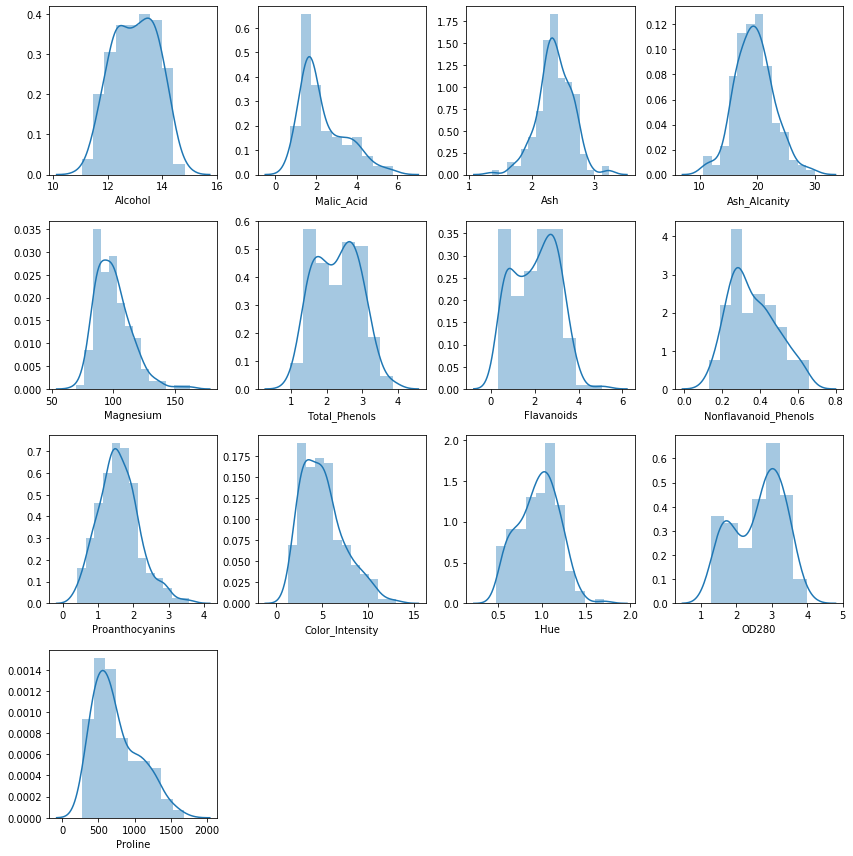

In [11]:
fig = plt.figure(figsize=(12,12))
i = 1

for col in df.columns :
    if col != 'Customer_Segment':
        plt.subplot(4,4,i)
        sns.distplot(df[col])
        i+=1
fig.tight_layout()

Note :  
* distribution ของ Ash, Ash Alcanity, Proanthocyanins มีลักษณะคล้าย normal distribution
* distribution ของ features อื่นๆ ไม่เป็น Normal distribution


## 7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

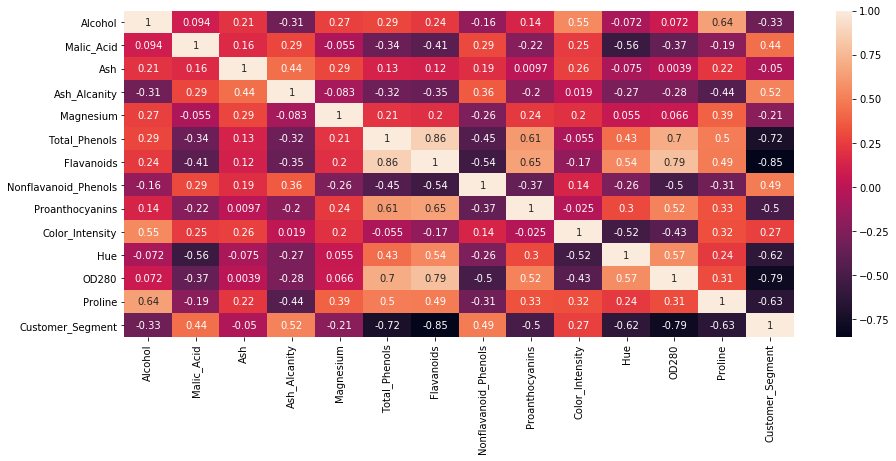

In [12]:
fig = plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

## 8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด


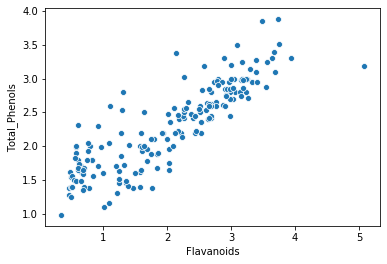

In [13]:
# most correlated pair : Flavanoids & Total_Phenols
sns.scatterplot(x=df['Flavanoids'], y=df['Total_Phenols'] )

## 9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด


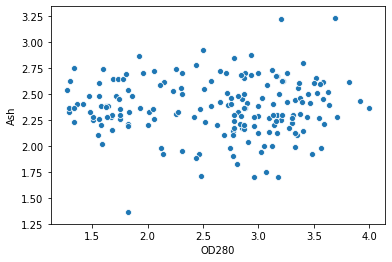

In [14]:
# least correlated pair : OD280 & Ash
sns.scatterplot(x=df['OD280'], y=df['Ash'])

## 10. สร้าง histogram ของ feature เพื่อดูการกระจายตัวของข้อมูล

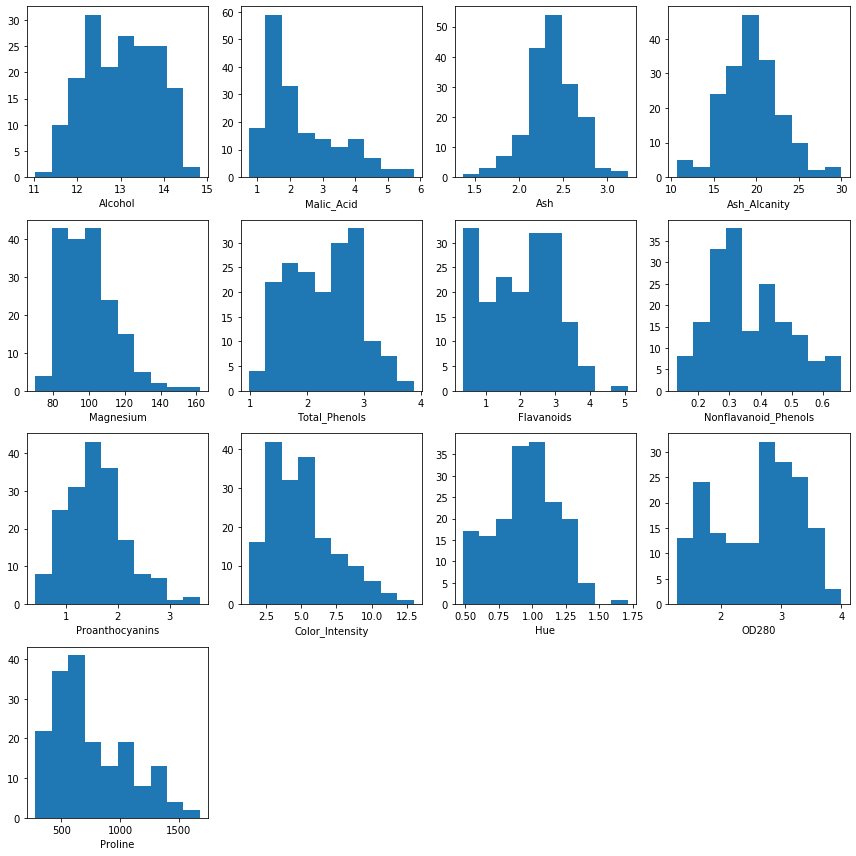

In [15]:
fig = plt.figure(figsize=(12,12))
i = 1

for col in df.columns :
    if col != 'Customer_Segment':
        plt.subplot(4,4,i)
        plt.hist(df[col])
        plt.xlabel(col)
        i+=1
fig.tight_layout()

Note :  
มีแค่ Ash feature เดียวที่มี distribution คล้าย Normal distribution

## 11. สร้าง boxplot เพื่อเช็ค outliers ของแต่ละฟีเจอร์


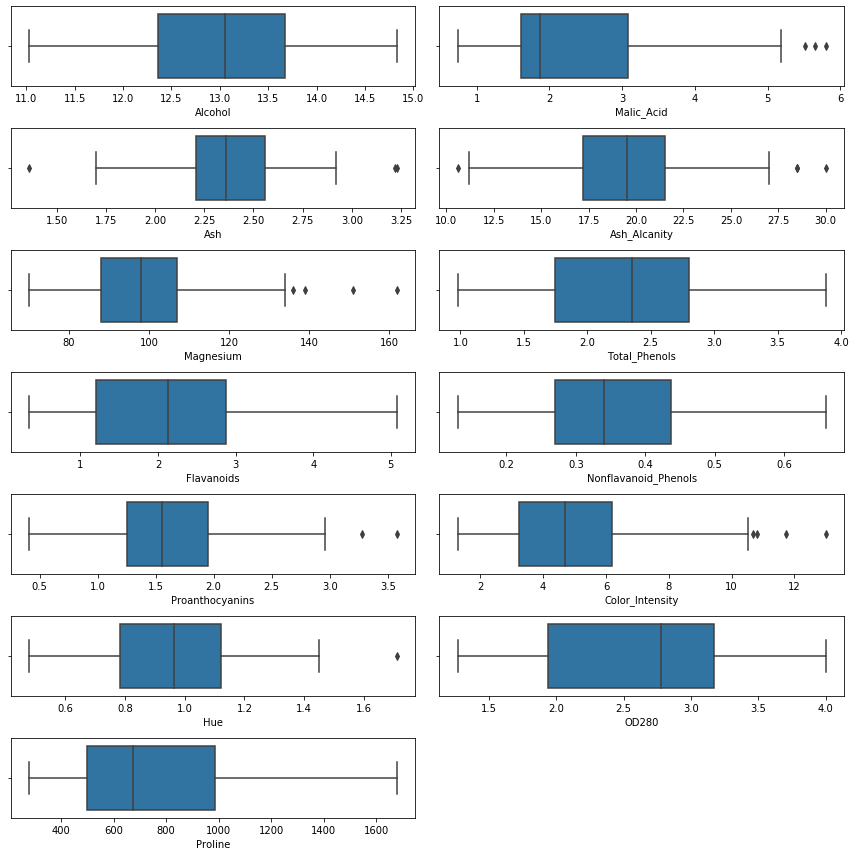

In [16]:
fig = plt.figure(figsize=(12,12))
i = 1

for col in df.columns :
    if col != 'Customer_Segment':
        plt.subplot(7,2,i)
        sns.boxplot(df[col])
        i+=1
fig.tight_layout()

Note :  
มี outliers เล็กน้อย

## 12. จัดการกับ Outliers ได้ตามความเหมาะสม


In [17]:
# Note :  
# IQR = Q3 - Q1  
# lower fence = Q1 - (1.5 * IQR)  
# upper fence = Q3 + (1.5 * IQR) 

def clip_outliers(series):
    # calculate Q1, Q3, IQR, lower_fence and upper_fence
    Q1 = series.describe()[4]
    Q3 = series.describe()[6]
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)
    
    # clip outliers
    series = [lower_fence if x < lower_fence else upper_fence if x > upper_fence else x for x in series]
    return series

In [18]:
for col in df.columns :
    if col != 'Customer_Segment':
        df[col] = clip_outliers(df[col])

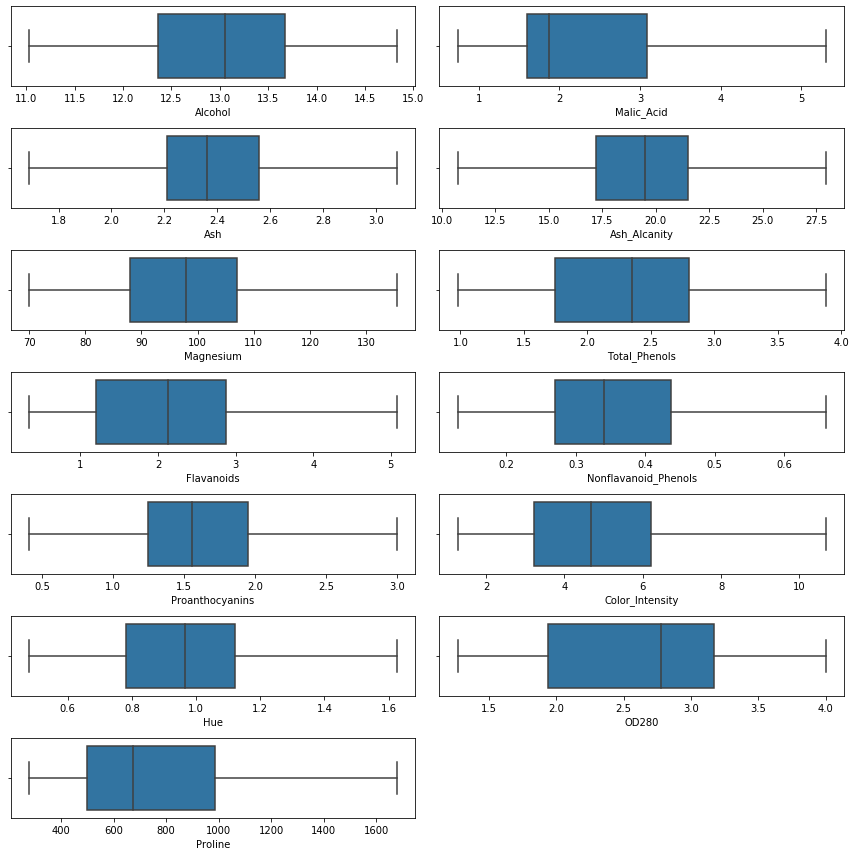

In [19]:
# Plot the box plot again

fig = plt.figure(figsize=(12,12))
i = 1

for col in df.columns :
    if col != 'Customer_Segment':
        plt.subplot(7,2,i)
        sns.boxplot(df[col])
        i+=1
fig.tight_layout()

## 13. สร้าง train/test split ของข้อมูล ด้วย 70:30 ratio 

In [20]:
# X and y
X = df.drop(['Customer_Segment'], axis=1).copy()
y = df['Customer_Segment'].copy()

In [21]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=400)
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (124, 13)
X_test shape :  (54, 13)
y_train shape :  (124,)
y_test shape :  (54,)


## 14. ทำ Standardization ให้ X_train, X_test


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# define scaler
sc_X = StandardScaler()
# fit_transform X_train
X_train_sc = sc_X.fit_transform(X_train)
# transform X_test
X_test_sc = sc_X.transform(X_test)

In [27]:
X_train_sc

array([[ 0.12943256,  1.70598004, -0.02428738, ..., -1.67472543,
        -1.93297891, -0.62139418],
       [-0.96373161,  0.81175174, -0.17510477, ..., -1.28300348,
        -1.19374444, -0.74749332],
       [ 0.16669952, -0.34971721,  1.44618221, ..., -1.50062679,
        -1.93297891, -1.01545399],
       ...,
       [-0.05690224,  0.58562504,  1.25766047, ..., -0.8042322 ,
        -0.48407935, -0.46377026],
       [ 0.86234945, -1.01781881, -1.68327871, ...,  1.19790223,
        -0.26230901, -0.3691959 ],
       [-0.35503792, -0.7300212 , -0.40133086, ...,  0.02273637,
        -0.85369658, -0.7947805 ]])

In [28]:
X_test_sc

array([[-1.69664849e+00, -9.15033948e-01,  1.25766047e+00,
         2.05321224e-01, -4.07874397e-01,  7.69828101e-01,
         9.12271976e-01, -5.73580018e-01,  1.65378775e+00,
        -1.00962657e+00,  2.27363706e-02,  9.20466146e-01,
        -2.11571982e-01],
       [ 1.34681993e+00, -6.27236333e-01, -3.25922164e-01,
        -1.04731503e+00,  1.83684905e+00,  1.18836533e+00,
         1.17113176e+00, -9.93934168e-01,  9.28962886e-01,
         2.49318509e-01,  5.88556971e-01,  1.58577717e+00,
         1.03675864e-01],
       [-3.42615603e-01,  1.67514458e+00,  1.26530016e-01,
         1.14479841e+00,  8.31588577e-02,  9.14706374e-01,
         5.29159498e-01,  6.03411603e-01,  6.50184092e-01,
        -1.04319844e+00,  1.02380359e+00,  7.28265184e-01,
        -8.95659807e-01],
       [ 1.53315473e+00,  1.84987885e+00,  2.77347409e-01,
        -1.39153745e-01,  7.84634936e-01,  9.46901546e-01,
         6.32703411e-01, -4.89509188e-01, -6.50783616e-01,
         7.72626814e-02, -3.68985584e

## 15. เลือกชนิดของ Baseline โมเดล 2 ชนิด (ควรเป็น Tree-based 1 อัน)


Note :  
Classification Problem  
* model 1 : SVM
* model 2 : Random Forest

## 16. เทรนโมเดลทั้ง 2 ชนิด


### SVM

In [29]:
from sklearn.svm import SVC

In [30]:
# define model
clf = SVC()
# fit the model
clf.fit(X_train_sc, y_train)
# make prediction
y_pred_svm = clf.predict(X_test_sc)

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# define model
clf = RandomForestClassifier(criterion='entropy', random_state=100)
# fit the model
clf.fit(X_train_sc, y_train)
# make prediction
y_pred_rf = clf.predict(X_test_sc)

## 17. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision (ทั้งแบบ micro, macro)


In [33]:
from sklearn import metrics

In [34]:
def model_eval(y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    f1_micro = metrics.f1_score(y_test, y_pred, average='micro')
    f1_macro = metrics.f1_score(y_test, y_pred, average='macro')
    precision_micro = metrics.precision_score(y_test, y_pred, average='micro')
    precision_macro = metrics.precision_score(y_test, y_pred, average='macro')
    recall_micro = metrics.recall_score(y_test, y_pred, average='micro')
    recall_macro = metrics.recall_score(y_test, y_pred, average='macro')
    
    print('---Model Evaluation---')
    print('Confusion Matrix : \n', cm)
    print('F1 score (micro) : ', f1_micro)
    print('F1 score (macro) : ', f1_macro)
    print('Precision (micro) : ', precision_micro)
    print('Precision (macro) : ', precision_macro)
    print('Recall (micro) : ', recall_micro)
    print('Recall (macro) : ', recall_macro)
    
    return cm, acc, f1_micro, f1_macro, precision_micro, precision_macro, recall_micro, recall_macro

In [35]:
df_eval = pd.DataFrame(columns=['Model','Acc','F1_micro','F1_macro','Precision_micro','Precision_macro','Recall_micro','Recall_macro'])

In [36]:
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro


In [37]:
columns=['Model','Acc','F1_micro','F1_macro','Precision_micro','Precision_macro','Recall_micro','Recall_macro']

### SVM

In [38]:
svm_cm, svm_acc, svm_f1micro, svm_f1macro, svm_premicro, svm_premacro, svm_recmicro, svm_recmacro = model_eval(y_test, y_pred_svm)
df_eval = df_eval.append(pd.DataFrame([['SVM',svm_acc, svm_f1micro, svm_f1macro, svm_premicro, svm_premacro, svm_recmicro, svm_recmacro]],
                                     columns=columns), ignore_index=True)
df_eval

---Model Evaluation---
Confusion Matrix : 
 [[17  1  0]
 [ 0 19  0]
 [ 0  1 16]]
F1 score (micro) :  0.9629629629629629
F1 score (macro) :  0.9637085137085138
Precision (micro) :  0.9629629629629629
Precision (macro) :  0.9682539682539683
Recall (micro) :  0.9629629629629629
Recall (macro) :  0.9618736383442266


,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.962963,0.962963,0.963709,0.962963,0.968254,0.962963,0.961874


### Random Forest

In [39]:
rf_cm, rf_acc, rf_f1micro, rf_f1macro, rf_premicro, rf_premacro, rf_recmicro, rf_recmacro = model_eval(y_test, y_pred_rf)
df_eval = df_eval.append(pd.DataFrame([['Random Forest',rf_acc, rf_f1micro, rf_f1macro, rf_premicro, rf_premacro, rf_recmicro, rf_recmacro]],
                                      columns=columns), ignore_index=True)
df_eval

---Model Evaluation---
Confusion Matrix : 
 [[17  1  0]
 [ 0 18  1]
 [ 0  0 17]]
F1 score (micro) :  0.9629629629629629
F1 score (macro) :  0.9634085213032582
Precision (micro) :  0.9629629629629629
Precision (macro) :  0.9639376218323585
Recall (micro) :  0.9629629629629629
Recall (macro) :  0.9639376218323586


,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.962963,0.962963,0.963709,0.962963,0.968254,0.962963,0.961874
1,Random Forest,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938


## 18. ทำ hyperparameter tuning ด้วย GridSearchCV


In [40]:
from sklearn.model_selection import GridSearchCV

### Grid Search on SVM

In [41]:
params = {'C':[0.001,0.01, 0.1,1,10,100],
         'gamma':['scale','auto']}
grid_svm = GridSearchCV(SVC(), params, verbose=1)
# fit the grid search
grid_svm.fit(X_train_sc, y_train)
print(grid_svm.best_params_)
# make prediction
y_pred_svm_grid = grid_svm.predict(X_test_sc)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 10, 'gamma': 'scale'}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished


### Grid Search on Random Forest

In [42]:
params = {'n_estimators':[10,100,200,500],
         'min_samples_leaf':[1,2,5,10]}
grid_rf = GridSearchCV(RandomForestClassifier(criterion='entropy', random_state=100), params, verbose=1,n_jobs=-1)
# fit the grid search
grid_rf.fit(X_train_sc, y_train)
print(grid_rf.best_params_)
# make prediction 
y_pred_rf_grid = grid_rf.predict(X_test_sc)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   20.6s finished


{'min_samples_leaf': 1, 'n_estimators': 100}


## 19. วัดผลโมเดลใหม่ โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision (ทั้งแบบ micro, macro)



### SVM + Grid Search

In [43]:
svmgrid_cm, svmgrid_acc, svmgrid_f1micro, svmgrid_f1macro, svmgrid_premicro, svmgrid_premacro, svmgrid_recmicro, svmgrid_recmacro = model_eval(y_test, y_pred_svm_grid)
df_eval = df_eval.append(pd.DataFrame([['SVM+GridSearch',svmgrid_acc, svmgrid_f1micro, svmgrid_f1macro, svmgrid_premicro, svmgrid_premacro, svmgrid_recmicro, svmgrid_recmacro]],
                                      columns=columns), ignore_index=True)
df_eval

---Model Evaluation---
Confusion Matrix : 
 [[18  0  0]
 [ 0 19  0]
 [ 0  1 16]]
F1 score (micro) :  0.9814814814814815
F1 score (macro) :  0.9813519813519814
Precision (micro) :  0.9814814814814815
Precision (macro) :  0.9833333333333334
Recall (micro) :  0.9814814814814815
Recall (macro) :  0.9803921568627452


,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.962963,0.962963,0.963709,0.962963,0.968254,0.962963,0.961874
1,Random Forest,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
2,SVM+GridSearch,0.981481,0.981481,0.981352,0.981481,0.983333,0.981481,0.980392


### Random Forest +Grid Search

In [44]:
rfgrid_cm, rfgrid_acc, rfgrid_f1micro, rfgrid_f1macro, rfgrid_premicro, rfgrid_premacro, rfgrid_recmicro, rfgrid_recmacro = model_eval(y_test, y_pred_rf_grid)
df_eval = df_eval.append(pd.DataFrame([['RandomForest+GridSearch',rfgrid_acc, rfgrid_f1micro, rfgrid_f1macro, rfgrid_premicro, rfgrid_premacro, rfgrid_recmicro, rfgrid_recmacro]],
                                      columns=columns), ignore_index=True)
df_eval

---Model Evaluation---
Confusion Matrix : 
 [[17  1  0]
 [ 0 18  1]
 [ 0  0 17]]
F1 score (micro) :  0.9629629629629629
F1 score (macro) :  0.9634085213032582
Precision (micro) :  0.9629629629629629
Precision (macro) :  0.9639376218323585
Recall (micro) :  0.9629629629629629
Recall (macro) :  0.9639376218323586


,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.962963,0.962963,0.963709,0.962963,0.968254,0.962963,0.961874
1,Random Forest,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
2,SVM+GridSearch,0.981481,0.981481,0.981352,0.981481,0.983333,0.981481,0.980392
3,RandomForest+GridSearch,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938


Note :  
Random forest best parameters คือ parameters เดียวกับ default model  
ดังนั้น evaluation metrics จึงมีค่าเท่าเดิม

## 20. ทำ PCA โดยกำหนดให้มี output = 2 components


In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [47]:
print('X_train_pca shape : ', X_train_pca.shape)
print('X_test_pca shape : ', X_test_pca.shape)

X_train_pca shape :  (124, 2)
X_test_pca shape :  (54, 2)


## 21. ทำ DataFrame วัดอิทธิพลของฟีเจอร์เก่าต่อ Components ใหม่ที่ PCA สร้างขึ้น


In [48]:
pca.components_

array([[ 1.53112386e-01, -2.19868039e-01, -7.68988712e-03,
        -2.54326563e-01,  1.37676201e-01,  4.04571780e-01,
         4.25026221e-01, -2.80009798e-01,  3.11196239e-01,
        -9.42697722e-02,  2.94759595e-01,  3.68854636e-01,
         3.05157042e-01],
       [-4.63684221e-01, -2.27765072e-01, -3.18411709e-01,
         2.86645587e-02, -3.17349363e-01, -8.77846557e-02,
         4.61630403e-04,  1.82218494e-02, -3.05953412e-02,
        -5.21964910e-01,  3.08689859e-01,  2.14714765e-01,
        -3.27701124e-01]])

In [49]:
df_comp = pd.DataFrame(pca.components_, columns=X_train.columns)
df_comp

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.153112,-0.219868,-0.007690,-0.254327,0.137676,0.404572,0.425026,-0.280010,0.311196,-0.094270,0.29476,0.368855,0.305157
1,-0.463684,-0.227765,-0.318412,0.028665,-0.317349,-0.087785,0.000462,0.018222,-0.030595,-0.521965,0.30869,0.214715,-0.327701


Note :  
* component 1 : จะเห็นว่า features ที่มีค่ามากที่สุด 2 ค่า คือ Flavanoids และ Total_Phenols ซึ่งเป็นคู่ของ features ที่มี correlation สูงที่สุด
* component 2 : features ที่มีค่ามากที่สุด 2 ค่า คือ Hue และ OD280

## 23. ทำ Clustering Visualization ของ Components ต่อผลลัพธ์ทั้ง 3 Classes


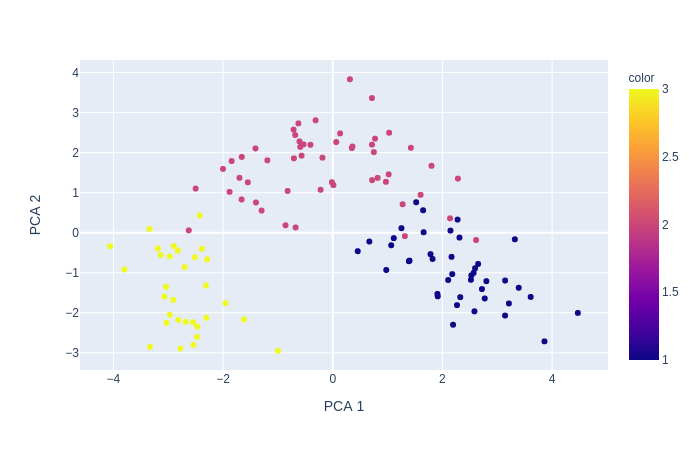

In [50]:
fig = px.scatter(x=X_train_pca[:,0], y=X_train_pca[:,1], color=y_train, labels={'x':'PCA 1', 'y':'PCA 2'})
fig.show()

## 24. เทรนโมเดลทั้ง 2 ชนิดกับข้อมูล PCA



### SVM + pca

In [51]:
# define model
clf = SVC()
# fit the model
clf.fit(X_train_pca, y_train)
# make prediction
y_pred_svm_pca = clf.predict(X_test_pca)

### Random Forest + pca

In [52]:
# define model
clf = RandomForestClassifier(criterion='entropy', random_state=100)
# fit the model
clf.fit(X_train_pca, y_train)
# make prediction
y_pred_rf_pca = clf.predict(X_test_pca)

## 25. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision (ทั้งแบบ micro, macro)


### SVM + pca

In [53]:
svmpca_cm, svmpca_acc, svmpca_f1micro, svmpce_f1macro, svmpca_premicro, svmpca_premacro, svmpca_recmicro, svmpca_recmacro = model_eval(y_test, y_pred_svm_pca)
df_eval = df_eval.append(pd.DataFrame([['SVM+pca',svmpca_acc, svmpca_f1micro, svmpce_f1macro, svmpca_premicro, svmpca_premacro, svmpca_recmicro, svmpca_recmacro]],
                                      columns=columns), ignore_index=True)
df_eval

---Model Evaluation---
Confusion Matrix : 
 [[18  0  0]
 [ 0 19  0]
 [ 0  0 17]]
F1 score (micro) :  1.0
F1 score (macro) :  1.0
Precision (micro) :  1.0
Precision (macro) :  1.0
Recall (micro) :  1.0
Recall (macro) :  1.0


,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.962963,0.962963,0.963709,0.962963,0.968254,0.962963,0.961874
1,Random Forest,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
2,SVM+GridSearch,0.981481,0.981481,0.981352,0.981481,0.983333,0.981481,0.980392
3,RandomForest+GridSearch,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
4,SVM+pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Random Forest + pca

In [54]:
rfpca_cm, rfpca_acc, rfpca_f1micro, rfpce_f1macro, rfpca_premicro, rfpca_premacro, rfpca_recmicro, rfpca_recmacro = model_eval(y_test, y_pred_rf_pca)
df_eval = df_eval.append(pd.DataFrame([['RandomForest+pca',rfpca_acc, rfpca_f1micro, rfpce_f1macro, rfpca_premicro, rfpca_premacro, rfpca_recmicro, rfpca_recmacro]],
                                      columns=columns), ignore_index=True)
df_eval

---Model Evaluation---
Confusion Matrix : 
 [[18  0  0]
 [ 0 19  0]
 [ 0  0 17]]
F1 score (micro) :  1.0
F1 score (macro) :  1.0
Precision (micro) :  1.0
Precision (macro) :  1.0
Recall (micro) :  1.0
Recall (macro) :  1.0


,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.962963,0.962963,0.963709,0.962963,0.968254,0.962963,0.961874
1,Random Forest,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
2,SVM+GridSearch,0.981481,0.981481,0.981352,0.981481,0.983333,0.981481,0.980392
3,RandomForest+GridSearch,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
4,SVM+pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,RandomForest+pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 22. ทำ Heatmap ของข้อ 21


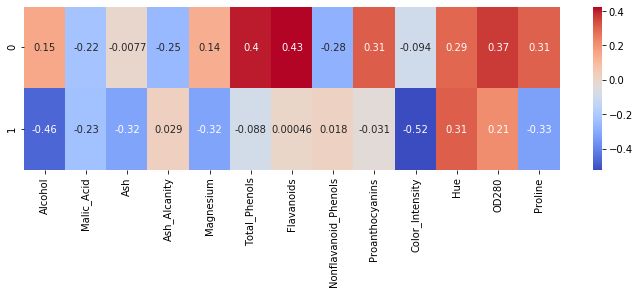

In [55]:
fig = plt.figure(figsize=(12,3))
sns.heatmap(df_comp, annot=True, cmap='coolwarm')

## 26. ทำ Hyperparameter tuning ด้วย GridSearchCV กับโมเดลใหม่


### Grid Search SVM+pca

In [56]:
params = {'C':[0.001,0.01, 0.1,1,10,100],
         'gamma':['scale','auto']}
grid_svmpca = GridSearchCV(SVC(), params, verbose=1)
# fit the grid search
grid_svmpca.fit(X_train_pca, y_train)
print(grid_svmpca.best_params_)
# make prediction
y_pred_svmpca_grid = grid_svmpca.predict(X_test_pca)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 0.1, 'gamma': 'auto'}


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


### Grid Search Random Forest + pca

In [57]:
params = {'n_estimators':[10,100,200,500],
         'min_samples_leaf':[1,2,5,10]}
grid_rfpca = GridSearchCV(RandomForestClassifier(criterion='entropy', random_state=100), params, verbose=1,n_jobs=-1)
# fit the grid search
grid_rfpca.fit(X_train_pca, y_train)
print(grid_rfpca.best_params_)
# make prediction 
y_pred_rfpca_grid = grid_rfpca.predict(X_test_pca)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   22.3s finished


{'min_samples_leaf': 2, 'n_estimators': 100}


## 27. วัดผลโมเดลใหม่ โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision (ทั้งแบบ micro, macro)


### Grid Search SVM+pca

In [58]:
svmpcagrid_cm, svmpcagrid_acc, svmpcagrid_f1micro, svmpcagrid_f1macro, svmpcagrid_premicro, svmpcagrid_premacro, svmpcagrid_recmicro, svmpcagrid_recmacro = model_eval(y_test, y_pred_svmpca_grid)
df_eval = df_eval.append(pd.DataFrame([['SVM+pca+GridSearch',svmpcagrid_acc, svmpcagrid_f1micro, svmpcagrid_f1macro, svmpcagrid_premicro, svmpcagrid_premacro, svmpcagrid_recmicro, svmpcagrid_recmacro]],
                                      columns=columns), ignore_index=True)
df_eval

---Model Evaluation---
Confusion Matrix : 
 [[18  0  0]
 [ 0 19  0]
 [ 0  1 16]]
F1 score (micro) :  0.9814814814814815
F1 score (macro) :  0.9813519813519814
Precision (micro) :  0.9814814814814815
Precision (macro) :  0.9833333333333334
Recall (micro) :  0.9814814814814815
Recall (macro) :  0.9803921568627452


,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.962963,0.962963,0.963709,0.962963,0.968254,0.962963,0.961874
1,Random Forest,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
2,SVM+GridSearch,0.981481,0.981481,0.981352,0.981481,0.983333,0.981481,0.980392
3,RandomForest+GridSearch,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
4,SVM+pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,RandomForest+pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,SVM+pca+GridSearch,0.981481,0.981481,0.981352,0.981481,0.983333,0.981481,0.980392


### Grid Search Random Forest + pca

In [59]:
rfpcagrid_cm, rfpcagrid_acc, rfpcagrid_f1micro, rfpcagrid_f1macro, rfpcagrid_premicro, rfpcagrid_premacro, rfpcagrid_recmicro, rfpcagrid_recmacro = model_eval(y_test, y_pred_rfpca_grid)
df_eval = df_eval.append(pd.DataFrame([['RF+pca+GridSearch',rfpcagrid_acc, rfpcagrid_f1micro, rfpcagrid_f1macro, rfpcagrid_premicro, rfpcagrid_premacro, rfpcagrid_recmicro, rfpcagrid_recmacro]],
                                      columns=columns), ignore_index=True)
df_eval

---Model Evaluation---
Confusion Matrix : 
 [[18  0  0]
 [ 0 19  0]
 [ 0  0 17]]
F1 score (micro) :  1.0
F1 score (macro) :  1.0
Precision (micro) :  1.0
Precision (macro) :  1.0
Recall (micro) :  1.0
Recall (macro) :  1.0


,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.962963,0.962963,0.963709,0.962963,0.968254,0.962963,0.961874
1,Random Forest,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
2,SVM+GridSearch,0.981481,0.981481,0.981352,0.981481,0.983333,0.981481,0.980392
3,RandomForest+GridSearch,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
4,SVM+pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,RandomForest+pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,SVM+pca+GridSearch,0.981481,0.981481,0.981352,0.981481,0.983333,0.981481,0.980392
7,RF+pca+GridSearch,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 28. อธิบายว่าการวัดผล Precision, Recall แบบ micro และ macro แตกต่างกันอย่างไร พร้อมยกตัวอย่างประกอบ


Note :  
จากการทำ grid search ของ svm model บนข้อมูลที่ทำ pca พบว่า
* F1 score กับ Recall ระดับ micro มีค่ามากกว่าระดับ macro หมายความว่า ค่า  F1 และ Recall ที่คำนวณจาก tp,fp,tn,fn รวมทั้งหมดของทุก class มีค่ามากกว่า ค่าที่คำนวณจากค่าเฉลี่ยของ tp,fp,tn,fn ของแต่ละ class  
* เช่น confusion matrix ของ SVM+pca+grid search =   
    [[18,0,0],  
    [0,19,0],  
    [0,1,16]]  
* Recall แบบ micro มีค่า เท่ากับ (18+19+16)/(18+19+16+1) = 0.9814  
* แต่ถ้าคิด Recall แบบ macro   
    class 1 : recall = 18/18 = 1
    class 2 : recall = 19/19 = 1
    class 3 : recall = 16/17 = 0.9412
    macro recall = (1+1+0.9412)/3 = 0.980(18+19+16)/(18+19+16+1) = 0.9804
* ถ้าคิดค่า Precision แบบ micro = (18+19+16)/(18+19+16+1) = 0.9814
* ถ้าคิด Precision แบบ macro   
    class 1 : precision = 18/18 = 1  
    class 2 : precision = 19/(19+1) = 0.95  
    class 3 : precision = 16/16 = 1  
    macro precision = (1+0.95+1)/3 = 0.9833

## 29. ทำ Data Visualization ค่า Acc ของทุกโมเดลที่ทำมาด้วย plotly


In [60]:
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.962963,0.962963,0.963709,0.962963,0.968254,0.962963,0.961874
1,Random Forest,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
2,SVM+GridSearch,0.981481,0.981481,0.981352,0.981481,0.983333,0.981481,0.980392
3,RandomForest+GridSearch,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
4,SVM+pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,RandomForest+pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,SVM+pca+GridSearch,0.981481,0.981481,0.981352,0.981481,0.983333,0.981481,0.980392
7,RF+pca+GridSearch,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


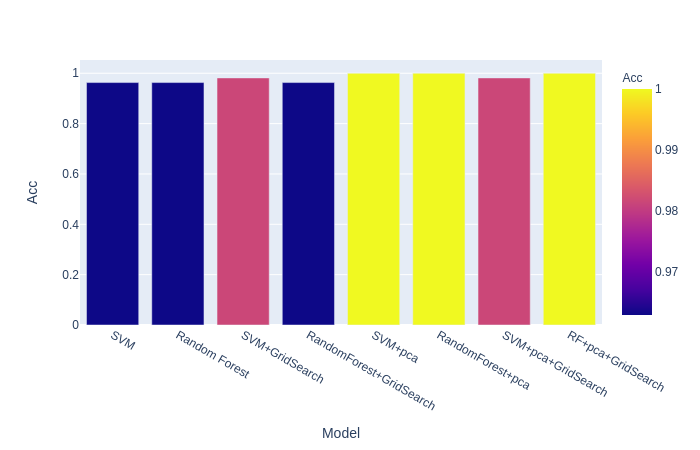

In [61]:
fig = px.bar(df_eval, x='Model', y='Acc', color='Acc')
fig.show()

## 30. ทำ Data Visualization ค่า F1 Score ของทุกโมเดลที่ทำมา ทั้งแบบ Micro และ Macro อยู่ในกราฟเดียวกัน


In [62]:
import plotly.graph_objects as go

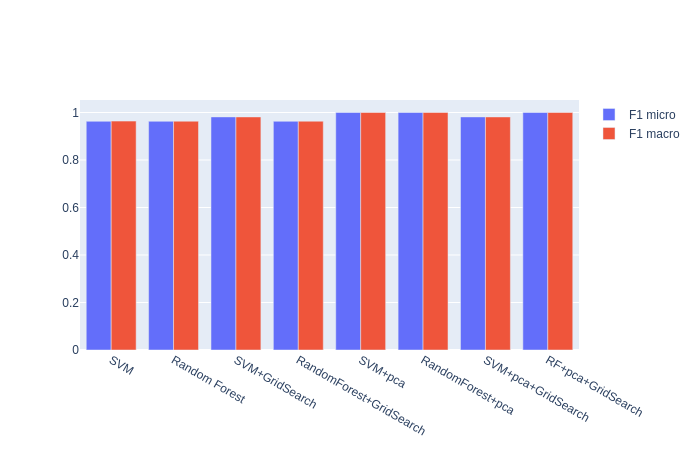

In [63]:
fig = go.Figure(data=[
    go.Bar(name='F1 micro', x=df_eval['Model'], y=df_eval['F1_micro']),
    go.Bar(name='F1 macro', x=df_eval['Model'], y=df_eval['F1_macro'])
],)

fig.update_layout(barmode='group')
fig.show()

## 31.ทำ Data Visualization ค่า Precision ของทุกโมเดลที่ทำมา ทั้งแบบ Micro และ Macro อยู่ในกราฟเดียวกัน


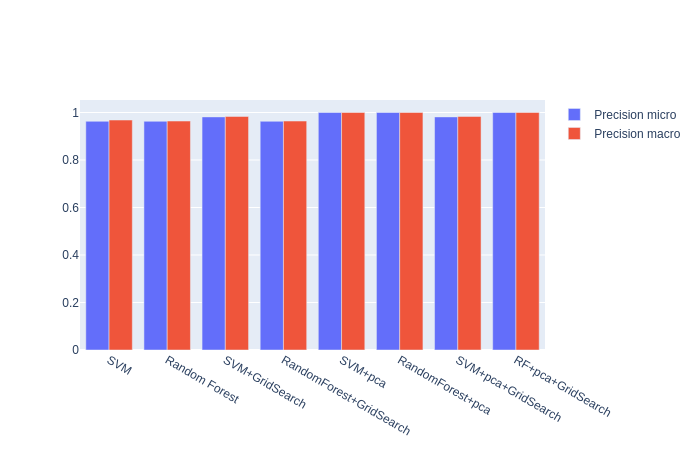

In [64]:
fig = go.Figure(data=[
    go.Bar(name='Precision micro', x=df_eval['Model'], y=df_eval['Precision_micro'],),
    go.Bar(name='Precision macro', x=df_eval['Model'], y=df_eval['Precision_macro'])
],)

fig.update_layout(barmode='group')
fig.show()

## 32. ทำ Data Visualization ค่า Recall ของทุกโมเดลที่ทำมา ทั้งแบบ Micro และ Macro อยู่ในกราฟเดียวกัน


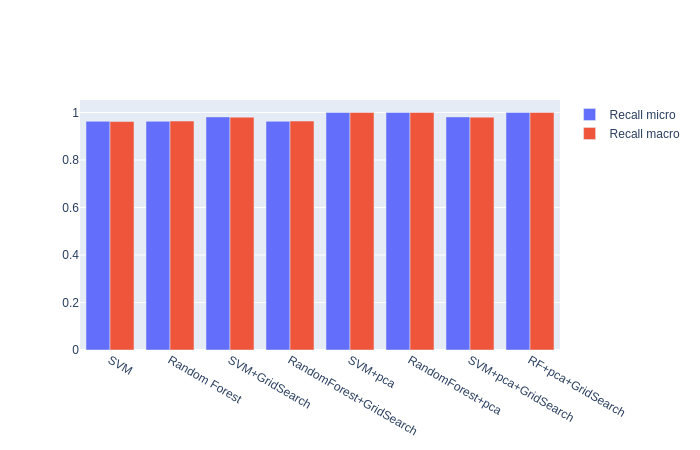

In [65]:
fig = go.Figure(data=[
    go.Bar(name='Recall micro', x=df_eval['Model'], y=df_eval['Recall_micro']),
    go.Bar(name='Recall macro', x=df_eval['Model'], y=df_eval['Recall_macro'])
],)

fig.update_layout(barmode='group')
fig.show()

Note :  
ผลของค่า evaluations ของโมเดล พบว่า dataset นี้เมื่อทำ PCA ทำให้ base line model ทั้ง SVM และ Random Forest มีประสิทธิภาพมากขึ้น

In [66]:
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.962963,0.962963,0.963709,0.962963,0.968254,0.962963,0.961874
1,Random Forest,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
2,SVM+GridSearch,0.981481,0.981481,0.981352,0.981481,0.983333,0.981481,0.980392
3,RandomForest+GridSearch,0.962963,0.962963,0.963409,0.962963,0.963938,0.962963,0.963938
4,SVM+pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,RandomForest+pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,SVM+pca+GridSearch,0.981481,0.981481,0.981352,0.981481,0.983333,0.981481,0.980392
7,RF+pca+GridSearch,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
# save the evaluation dataframe for comparison with LDA's
df_eval.to_csv('pca_eval.csv')